<B>Exploration and Experimenting dataset (MAIN FLOW)</B>
- Data Exploration
- Data Cleaning
- Data Experimenting
- Choosing the best model
- Tuning HyperParameters
<br>

<B>Data Exploration</B>

In [1]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", None)
pd.set_option('display.max_columns', None)

train_dataset = pd.read_csv("../data/train.csv")
test_dataset = pd.read_csv('../data/test.csv')

test_dataset['SalePrice'] = np.nan

data = pd.concat([train_dataset, test_dataset], axis=0)
data = data.set_index("Id")

data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

- Checking the null columns

In [3]:
data_null = data[data.isna().sum()[data.isna().sum() > 0].index]
data_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,SBrkr,1.0,0.0,Gd,Typ,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD,208500.0
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,SBrkr,0.0,1.0,TA,Typ,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD,181500.0
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD,223500.0
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,SBrkr,1.0,0.0,Gd,Typ,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD,140000.0
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,SBrkr,1.0,0.0,Gd,Typ,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD,250000.0


- Creating a subset of data with object data type

In [4]:
data_objects = data[data.select_dtypes(include='object').columns]
data_objects.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


- Dropping the columns with greater than 500 nulls
- Lower 500 null columns filled with mode
- Encoding object columns using pandas get_dummies()

In [5]:
data = data.drop(data_objects.isna().sum()[data_objects.isna().sum() > 500].index, axis=1)
data_objects = data_objects.drop(data_objects.isna().sum()[data_objects.isna().sum() > 500].index, axis=1)

for col in data_objects.columns:
    data_objects[col] = data_objects[col].fillna(data_objects[col].mode()[0])

data_objects = pd.get_dummies(data_objects)

data_objects.isna().sum()[data_objects.isna().sum() > 0]

Series([], dtype: int64)

In [6]:
data_objects.shape

(2919, 230)

- Creating a subset of data with numerical data types (int64 or float64)

In [7]:
data_numerical = data[data.select_dtypes(exclude='object').columns]

data_numerical.isna().sum()[data_numerical.isna().sum() > 0]

LotFrontage      486
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SalePrice       1459
dtype: int64

- Creating a subset for numerical columns with null values

In [8]:
numerical_null = data_numerical.columns[data_numerical.isna().any()]

numerical_null

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

- Filling the numerical columns with rounded mean

In [9]:
for col in numerical_null: 
    data_numerical.loc[:, col] = data_numerical[col].fillna(np.round(data_numerical[col].mean()))
    
data_numerical.isna().sum()[data_numerical.isna().sum() > 0]

Series([], dtype: int64)

In [10]:
data_numerical.shape

(2919, 37)

- Concatenating the numerical columns and object columns
- Splitting the data using index to create training data and testing data
- Dropping the correct answer (SalePrice)

In [11]:
data = pd.concat([data_numerical, data_objects], axis=1)

training_data = data[ : len(train_dataset)]
testing_data = data[len(train_dataset) : ]
testing_data = testing_data.drop(columns='SalePrice')

- Importing libraries and models needed for training

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

- Splitting the training data using train_test_split()
- Training LinearRegression model

In [13]:
X = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
model_1 = LinearRegression()

model_1.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Predicting X_test using Linear model
- Checking the MSE

In [14]:
prediction_1 = model_1.predict(X_test)

mean_squared_error(Y_test, prediction_1)

1588308241.9367616

- Plotting the prediction (Linear)

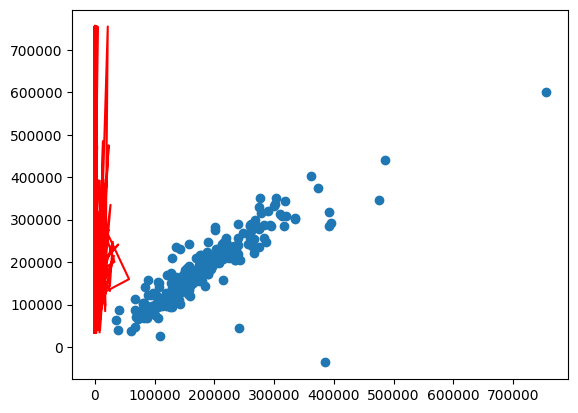

In [15]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, prediction_1)
plt.plot(X_test, Y_test, color='red')
plt.show()

- Training XGBRegressor model
- Predicting the X_test
- Checking the MSE and RMSE

In [16]:
model_2 = XGBRegressor(
    n_estimators=2000, 
    learning_rate=0.01,
    max_depth=5
)

model_2.fit(X_train, Y_train)

prediction_2 = model_2.predict(X_test)

print(mean_squared_error(Y_test, prediction_2))
print(np.sqrt(mean_squared_error(Y_test, prediction_2)))

759735880.728645
27563.306781455758


- Training RandomForestRegressor model
- Predicting the X_test
- Checking MSE

In [17]:
model_3 = RandomForestRegressor(n_estimators=100)
model_3.fit(X, y)

prediction_3 = model_3.predict(X_test)

mean_squared_error(Y_test, prediction_3)

132723686.34531368

<B>Choosing the best model</B>
- Creating json to loop and train models
- Comparing them using RMSE

In [18]:
models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=1000),
    "XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.1)
}

for name, model in models.items(): 
    model.fit(X_train, Y_train)
    RMSE = np.sqrt(mean_squared_error(Y_test, model.predict(X_test)))
    print(name, ": ", RMSE)

Linear :  39853.585057517244
RandomForest :  28452.000323468146
XGBoost :  29167.994530633347


- Creating a json with models and its hyperparameters
- Looping the json to iterate and use RandomizedSearchCV to get the best model
- Storing the output in dataframe

In [21]:
from sklearn.model_selection import RandomizedSearchCV

models = {
    "Linear": {
        "model": LinearRegression(),
        "params": {}
    },
    "RandomForest": {
        "model": RandomForestRegressor(),
        "params": {
            "n_estimators": [100, 200, 300]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params": {
            "n_estimators": [1000, 2000, 3000],
            "learning_rate": [0.01, 0.1, 0.3],
            "max_depth": [4, 5, 6]
        }
    }
}

scores = []

try:
    for name, model in models.items():
        rand = RandomizedSearchCV(
            model["model"],
            model["params"],
            n_iter=10,
            cv=5
        )
        
        rand.fit(X_train, Y_train)
        
        scores.append({
            "Model": name, 
            "Best Score": rand.best_score_,
            "Best Parameters": rand.best_params_
        })
except Exception:
    print(Exception)
    
scores = pd.DataFrame(scores, columns=["Model", "Best Score", "Best Parameters"])

scores

c:\Users\Kian Gabriel\Documents\Programming\Python\house-price-prediction\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\Kian Gabriel\Documents\Programming\Python\house-price-prediction\venv\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


,Model,Best Score,Best Parameters
0,Linear,0.770801,{}
1,RandomForest,0.855337,{'n_estimators': 300}
2,XGBoost,0.882557,"{'n_estimators': 3000, 'max_depth': 5, 'learni..."


- Finding the best tuning for the chosen model using GridSearchCV
- Given its possible hyperparameters
- Storing the output in dataframe

In [22]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    XGBRegressor(),
    {
        "n_estimators": [1000, 2000, 3000, 4000],
        "learning_rate": [0.02, 0.01, 0.1, 0.2],
        "max_depth": [3, 4, 5, 6]
    },
    n_jobs=-1,
    cv=5
)

grid.fit(X_train, Y_train)

df = pd.DataFrame(grid.cv_results_)

df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.566558,0.104700,0.064497,0.005026,0.02,3,1000,"{'learning_rate': 0.02, 'max_depth': 3, 'n_est...",0.922728,0.898881,0.807397,0.886118,0.899487,0.882922,0.039567,6
1,4.685111,0.026685,0.076457,0.011496,0.02,3,2000,"{'learning_rate': 0.02, 'max_depth': 3, 'n_est...",0.924651,0.898366,0.811607,0.886687,0.899510,0.884164,0.038333,3
2,6.905564,0.145417,0.065980,0.001953,0.02,3,3000,"{'learning_rate': 0.02, 'max_depth': 3, 'n_est...",0.925838,0.898119,0.813555,0.886580,0.900180,0.884854,0.037887,1
3,9.347101,0.168015,0.078760,0.013359,0.02,3,4000,"{'learning_rate': 0.02, 'max_depth': 3, 'n_est...",0.924976,0.897243,0.814367,0.886773,0.899875,0.884647,0.037312,2
4,3.141995,0.078527,0.065391,0.008458,0.02,4,1000,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.914770,0.899482,0.809806,0.892335,0.887564,0.880791,0.036666,27
5,6.113887,0.098543,0.068760,0.004640,0.02,4,2000,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.914774,0.897771,0.811765,0.891432,0.886946,0.880538,0.035661,33
6,9.118369,0.210876,0.080421,0.008565,0.02,4,3000,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.914592,0.896700,0.812105,0.891278,0.886974,0.880330,0.035385,34
7,12.907405,0.425338,0.088738,0.014820,0.02,4,4000,"{'learning_rate': 0.02, 'max_depth': 4, 'n_est...",0.914536,0.896153,0.812420,0.890802,0.887019,0.880186,0.035175,36
8,4.917320,0.378097,0.064282,0.005300,0.02,5,1000,"{'learning_rate': 0.02, 'max_depth': 5, 'n_est...",0.913638,0.896716,0.830114,0.890831,0.878221,0.881904,0.028291,13
9,8.694008,0.216478,0.078951,0.012384,0.02,5,2000,"{'learning_rate': 0.02, 'max_depth': 5, 'n_est...",0.913756,0.894611,0.830404,0.891795,0.878724,0.881858,0.028058,14


- Accessing the output directly from the GridSearchCV

In [ ]:
try:
    best_result = {
        **grid.best_params_,  # unpack best params dictionary
        "best_score": grid.best_score_,
        "best_estimator": str(grid.best_estimator_)  # convert model to string
    }
    df = pd.DataFrame([best_result])
except Exception as e:
    print(e)

   learning_rate  max_depth  n_estimators  best_score  \
0           0.02          3          3000    0.884854   

                                      best_estimator  
0  XGBRegressor(base_score=None, booster=None, ca...  


- Showing the output or the best hyperparameter tuning for the model

In [28]:
df

,learning_rate,max_depth,n_estimators,best_score,best_estimator
0,0.02,3,3000,0.884854,"XGBRegressor(base_score=None, booster=None, ca..."


<center>
<br><br>
<B>REPEAT THE FLOW</B>
</center>